In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes3.csv to diabetes3.csv


In [3]:
diabetes3 = pd.read_csv('diabetes3.csv')
diabetes3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148 mg/dl,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1,85 mg/dl,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8,183 mg/dl,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1,89 mg/dl,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0,137 mg/dl,40.0,35.0,168.0,43.1,2.288,33,1.0


In [4]:
diabetes3 = pd.read_csv('diabetes3.csv', na_values=['NA'])
diabetes3.describe()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,790.000000,779.000000,779.000000,768.000000,779.000000,779.000000,790.000000,779.000000
mean,3.877215,69.089859,20.670090,79.799479,31.964442,0.481904,33.067089,0.358151
std,3.331893,19.218929,15.878403,115.244002,7.831760,0.339493,11.670456,0.479765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,72.000000,23.000000,30.500000,32.000000,0.380000,29.000000,0.000000
75%,6.000000,80.000000,32.000000,127.250000,36.500000,0.642500,40.000000,1.000000
max,17.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


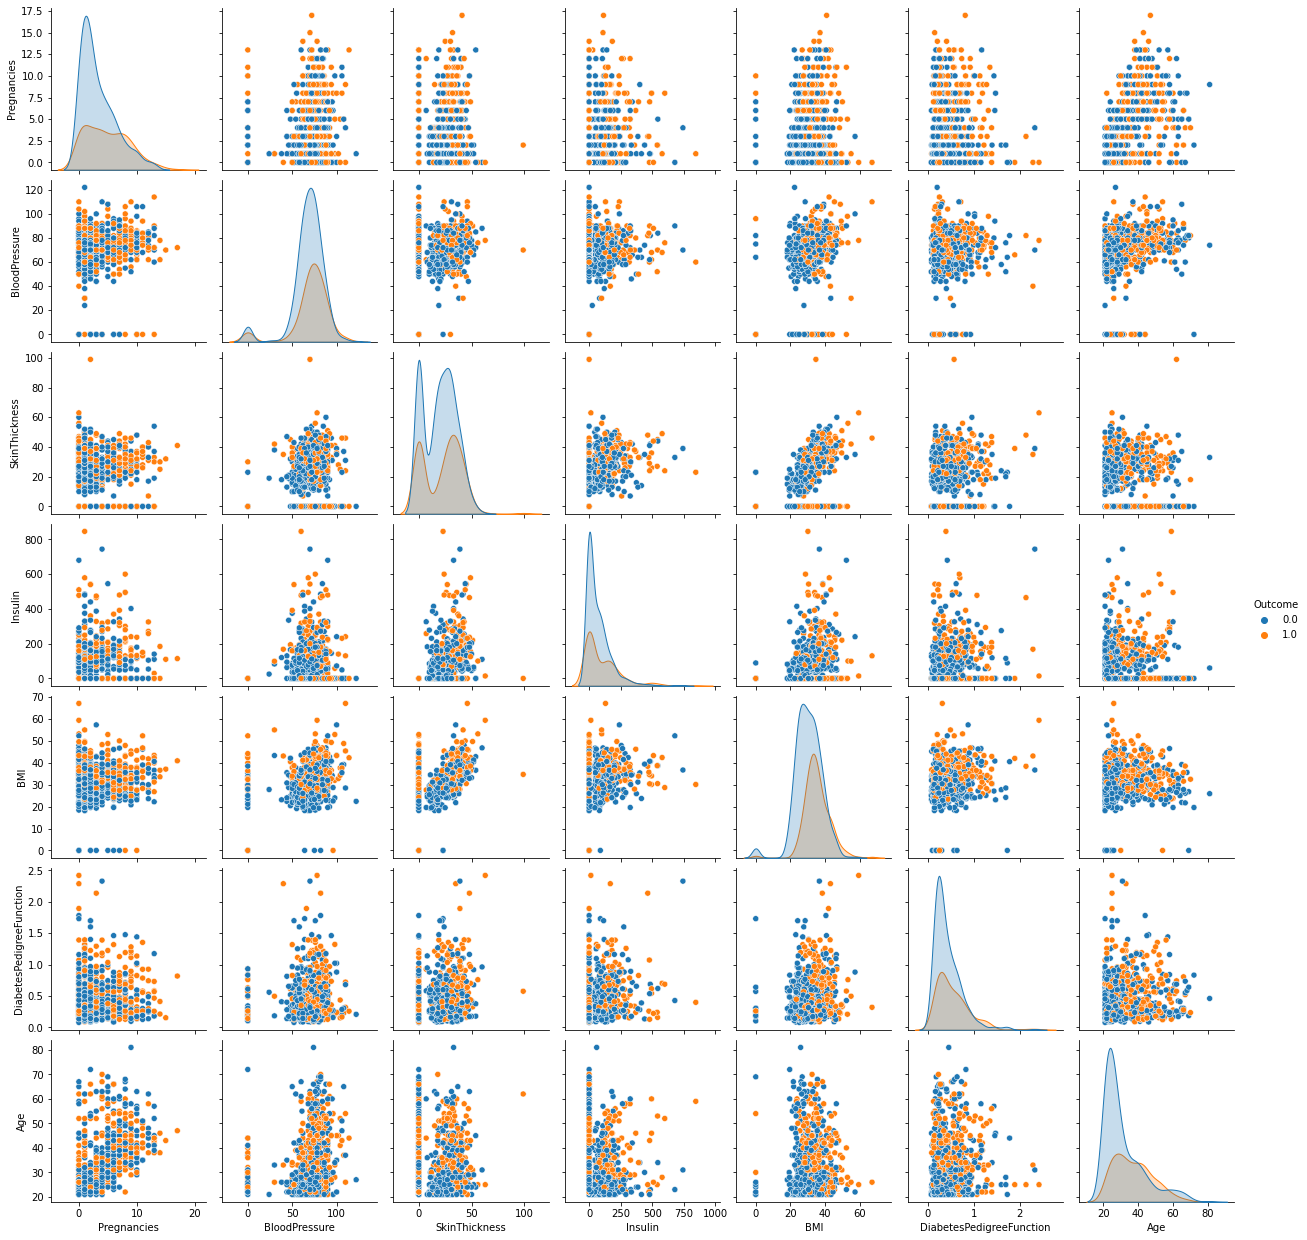

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(diabetes3.dropna(), hue='Outcome');

1. Błąd - zdublowane wiersze

2. Błąd - jednostka którą usunełam w glicose

In [6]:
duplicated_rows= diabetes3[diabetes3.duplicated()]
print(duplicated_rows)

     Pregnancies    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
220            6   NA mg/dl           68.0           30.0      NaN  30.0   
221            6   NA mg/dl           68.0           30.0      NaN  30.0   
227            4  136 mg/dl            NaN            NaN      NaN   NaN   
228            4  136 mg/dl            NaN            NaN      NaN   NaN   
248            6   NA mg/dl           68.0           30.0      NaN  30.0   
249            6   NA mg/dl           68.0           30.0      NaN  30.0   
275            6   NA mg/dl           68.0           30.0      NaN  30.0   
314            4  136 mg/dl            NaN            NaN      NaN   NaN   
326            6   NA mg/dl           68.0           30.0      NaN  30.0   
365            4  136 mg/dl            NaN            NaN      NaN   NaN   
376            6   NA mg/dl           68.0           30.0      NaN  30.0   
408            4  136 mg/dl            NaN            NaN      NaN   NaN   
537         

In [7]:
print(diabetes3)
diabetes3 = diabetes3.drop_duplicates()
print(diabetes3)

     Pregnancies    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6  148 mg/dl           72.0           35.0      0.0  33.6   
1              1   85 mg/dl           66.0           29.0      0.0  26.6   
2              8  183 mg/dl           64.0            0.0      0.0  23.3   
3              1   89 mg/dl           66.0           23.0     94.0  28.1   
4              0  137 mg/dl           40.0           35.0    168.0  43.1   
..           ...        ...            ...            ...      ...   ...   
785            2  122 mg/dl           70.0           27.0      0.0  36.8   
786            5  121 mg/dl           72.0           23.0    112.0  26.2   
787            1  126 mg/dl           60.0            0.0      0.0  30.1   
788            4  136 mg/dl            NaN            NaN      NaN   NaN   
789            1   93 mg/dl           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50      1

In [8]:
duplicated_rows = diabetes3[diabetes3.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


W niektórych pomiarach można zaobserwować 0 które w przypadku ciśnienia krwi czy bmi nie jest możliwe. Dlatego zdecydowałam się je usunąć.

In [9]:
diabetes3.loc[(diabetes3['BloodPressure'].isnull()) |
              (diabetes3['SkinThickness'].isnull()) |
              (diabetes3['BMI'].isnull()) |
              (diabetes3['Insulin'].isnull())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
99,4,136 mg/dl,NaN,NaN,NaN,NaN,1.182,22,1.0
219,6,NA mg/dl,68.0,30.0,NaN,30.0,NaN,32,NaN


Jak widać wygląda to na błąd pomiarowy

In [10]:
# first create missing indicator for features with missing data
for col in diabetes3.columns:
    missing = diabetes3[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        diabetes3['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in diabetes3.columns if 'ismissing' in col]
diabetes3['num_missing'] = diabetes3[ismissing_cols].sum(axis=1)

created missing indicator for: BloodPressure
created missing indicator for: SkinThickness
created missing indicator for: Insulin
created missing indicator for: BMI
created missing indicator for: DiabetesPedigreeFunction
created missing indicator for: Outcome


<ipython-input-10-ebd59edcbb5b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes3['{}_ismissing'.format(col)] = missing
<ipython-input-10-ebd59edcbb5b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes3['num_missing'] = diabetes3[ismissing_cols].sum(axis=1)


In [11]:
ind_missing = diabetes3[diabetes3['num_missing'] > 0].index


# Przepisujemy do zmiennej diabetes3 tylko obserwacje gdzie num_missing jest większe od 0
diabetes3 = diabetes3.drop(ind_missing, axis=0)
print(diabetes3)

     Pregnancies    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6  148 mg/dl           72.0           35.0      0.0  33.6   
1              1   85 mg/dl           66.0           29.0      0.0  26.6   
2              8  183 mg/dl           64.0            0.0      0.0  23.3   
3              1   89 mg/dl           66.0           23.0     94.0  28.1   
4              0  137 mg/dl           40.0           35.0    168.0  43.1   
..           ...        ...            ...            ...      ...   ...   
783           10  101 mg/dl           76.0           48.0    180.0  32.9   
785            2  122 mg/dl           70.0           27.0      0.0  36.8   
786            5  121 mg/dl           72.0           23.0    112.0  26.2   
787            1  126 mg/dl           60.0            0.0      0.0  30.1   
789            1   93 mg/dl           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  BloodPressure_ismissing  \
0              

In [12]:
diabetes3.loc[(diabetes3['BloodPressure'].isnull()) |
              (diabetes3['SkinThickness'].isnull()) |
              (diabetes3['BMI'].isnull()) |
              (diabetes3['Insulin'].isnull())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_ismissing,SkinThickness_ismissing,Insulin_ismissing,BMI_ismissing,DiabetesPedigreeFunction_ismissing,Outcome_ismissing,num_missing


In [13]:
cols_to_drop = ['BloodPressure_ismissing','SkinThickness_ismissing','Insulin_ismissing', 'BMI_ismissing', 'DiabetesPedigreeFunction_ismissing', 'Outcome_ismissing', 'num_missing']
diabetes3 = diabetes3.drop(cols_to_drop, axis=1)

diabetes3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148 mg/dl,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1,85 mg/dl,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8,183 mg/dl,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1,89 mg/dl,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0,137 mg/dl,40.0,35.0,168.0,43.1,2.288,33,1.0


In [14]:
diabetes3['Glucose_trim'] = diabetes3['Glucose'].str.strip("mg/dl")
print(diabetes3[['Glucose','Glucose_trim']])

       Glucose Glucose_trim
0    148 mg/dl         148 
1     85 mg/dl          85 
2    183 mg/dl         183 
3     89 mg/dl          89 
4    137 mg/dl         137 
..         ...          ...
783  101 mg/dl         101 
785  122 mg/dl         122 
786  121 mg/dl         121 
787  126 mg/dl         126 
789   93 mg/dl          93 

[768 rows x 2 columns]


In [15]:
diabetes3.drop(['Glucose'], axis=1)

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_trim
0,6,72.0,35.0,0.0,33.6,0.627,50,1.0,148
1,1,66.0,29.0,0.0,26.6,0.351,31,0.0,85
2,8,64.0,0.0,0.0,23.3,0.672,32,1.0,183
3,1,66.0,23.0,94.0,28.1,0.167,21,0.0,89
4,0,40.0,35.0,168.0,43.1,2.288,33,1.0,137
...,...,...,...,...,...,...,...,...,...
783,10,76.0,48.0,180.0,32.9,0.171,63,0.0,101
785,2,70.0,27.0,0.0,36.8,0.340,27,0.0,122
786,5,72.0,23.0,112.0,26.2,0.245,30,0.0,121
787,1,60.0,0.0,0.0,30.1,0.349,47,1.0,126


In [16]:
diabetes3 = diabetes3[["Pregnancies", "Glucose_trim", "BloodPressure","SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction", "Age", "Outcome"]]

In [17]:
column_names = diabetes3.columns
counter = diabetes3[column_names].isnull().sum()
print (counter)

Pregnancies                 0
Glucose_trim                0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [18]:
sb.pairplot(diabetes3_clean, hue='Outcome')

NameError: ignored

In [ ]:
sb.pairplot(diabetes3)

In [ ]:

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = diabetes3[['Pregnancies', 'Glucose_trim',
                             'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values

# Similarly, we can extract the class labels
all_labels = diabetes3['Outcome'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:9]

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

print(training_inputs.size)
print(testing_inputs.size)
print(testing_inputs.size/(testing_inputs.size+training_inputs.size))

In [ ]:
model_accuracies = []

for repetition in range(1000):


    #Dzielimy Dataset
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    #Uczymy model
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
    #I tak 1000 razy

plt.hist(model_accuracies, bins=10)

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
print('Scores: %s' % cv_scores)
plt.hist(cv_scores)
plt.title('Average score: {:.3f}'.format(np.mean(cv_scores)))

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {:.3f}'.format(np.mean(cv_scores)))

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

In [ ]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
print(dt_scores)
sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')

In [ ]:
#las decyzyjny
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

In [ ]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')